<a href="https://colab.research.google.com/github/Karnis052/ML/blob/main/Sentiment_Analysis_of_Code_Mixed_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras


In [ ]:
!wget https://www.dropbox.com/s/kc77yps787sqt92/kaggle.json 

--2023-02-15 11:40:28--  https://www.dropbox.com/s/kc77yps787sqt92/kaggle.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/kc77yps787sqt92/kaggle.json [following]
--2023-02-15 11:40:29--  https://www.dropbox.com/s/raw/kc77yps787sqt92/kaggle.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c7e5531748035be5793cb29fc.dl.dropboxusercontent.com/cd/0/inline/B2gSWqkym7ZWga2SvSNUQOsRpcOePwlpw8zKt7AF-mTvaUl9bcBHyBe7s7pmBUDBRbWieLO-HLa79yHTRDLyqV5waoSOEq3ibJAhIMyRqzxMoSFVUQUGAaJgx2_-WyjKFsydKXsBdNA0Cok5HKGqAe29IV9m3nKjG9_VXI0gLJ9yWA/file# [following]
--2023-02-15 11:40:29--  https://uc0c7e5531748035be5793cb29fc.dl.dropboxusercontent.com/cd/0/inline/B2gSWqkym7ZWga2SvSNUQOsRpcOePwlpw8zKt7AF-mTvaUl9bcBHyBe7s7pmBUDBRbWieLO-HLa79yHTRDL

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download clblp-task-2

  0% 0.00/1.37M [00:00<?, ?B/s]
100% 1.37M/1.37M [00:00<00:00, 130MB/s]


In [ ]:
!unzip clblp-task-2

Archive:  clblp-task-2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
dataset = pd.read_csv("train.csv")
dataset

,Reviews,Sentiment
0,মুরগির chaap সত্যিই মুখরোচক হয়। আমি এটা পছন্দ...,1
1,একটি ম্যাসেজ থেরাপিস্ট যারা ব্যাখ্যা করেছেন যে...,0
2,এটির মান একটি যুগ্ম মান নয়।,0
3,আমি মনে করি তারা একটি উন্নততর প্রধান ভাড়া প্র...,0
4,প্রস্তুতিটা খুবই ভালো - সত্যিই সুস্বাদু। যত তা...,1
...,...,...
6854,ইস্ আমি আমার টাকা নষ্ট না করেছে! আমি সাধারণত ক...,1
6855,আমি মনে করি শেফ Silvana মধ্যে Esparza প্রথম রে...,0
6856,অস্বাস্থ্যকর অস্বাস্থ্যকর খাদ্য সন্ত্রাসী,1
6857,খাদ্য প্রতিটি penny.ব্যবহারপরিবার ও বন্ধুদের স...,1


In [ ]:
testset = pd.read_csv("test.csv")
testset

,Id,Reviews
0,0,"সুতরাং, গতকাল সকালে, আমি আসলে একটি prego ক্ষুধ..."
1,1,এটা আমাদের জন্য বিশেষ কিছু নেই। আমরা ইফতার ও ব...
2,2,"ঢাকায় ভালো ঠিকানা, বিশেষ করে যদি আপনি ওয়েস্ট..."
3,3,আমার জন্য তা গন্ধ আমি সবসময় পছন্দ চাকন মত ছিল...
4,4,খাবার ও পরিবেশ এত ভাল! সঙ্গীর সঙ্গে থাকা ভালো ...
...,...,...
1710,1710,আমি খাদ্য :) খুব সুস্বাদু এবং রেস্টুরেন্ট এর প...
1711,1711,খারাপ আচরণ। খারাপ ম্যানেজমেন্ট সিস্টেম। খারাপ ...
1712,1712,নিশ্চিতভাবে অধিকারী না $ 3 আমি দেওয়া।
1713,1713,আলু চিপ অর্ডার দু: খিত ছিল ... আমি সম্ভবত গণনা...


In [ ]:
dataset.columns

Index(['Reviews', 'Sentiment'], dtype='object')

In [ ]:
testset.columns

Index(['Id', 'Reviews'], dtype='object')

In [ ]:
number_of_classes = len(dataset['Sentiment'].unique())
number_of_classes

2

In [ ]:
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  6859


In [ ]:
# cleaning function
def cleaning(row):
  text = re.sub('[^\u0980-\u09FF]',' ', row) ## removing punctions
  return text 

dataset['cleaned'] = dataset.Reviews.apply(cleaning)  

In [ ]:
testset['cleaned'] = testset.Reviews.apply(cleaning)

In [ ]:
dataset.columns

Index(['Reviews', 'Sentiment', 'cleaned'], dtype='object')

In [ ]:
## Printing the raw dataset
for i in list(np.random.randint(1,len(dataset),10)):
  print(dataset['cleaned'][i],"\n",dataset['Sentiment'][i])

আমার বন্ধু আমাকে বলছে কিভাবে ভাল তাদের দুপুরের খাবার দুইবার হয় দেননি     আমি এটা চেষ্টা করেছি  কিন্তু এটা আমার জন্য কিছুই করিনি  স্যান্ডউইচ কিছু         পেতে পারেন মত   লীঢ় কিন্তু দ্বিগুণ দাম  ফাইন ফুডস একটি পাইকারী হারে সরবরাহকারী নামক হচ্ছে  আমি কোন সাধারণ স্যান্ডউইচ মত স্বাদ খাদ্য প্রত্যাশিত         আমি কি ছিল     হাম পাস্তা   পক্ষের সঙ্গে একটি পাণিনির উপর            মাশরুম সঙ্গে পনির  এক পারমায় তৈয়ারি পনির ছিল এবং অন্যান্য ম্যাকারনি ছিল  হয়তো এটা পাণিনির রুটি ছিল  আমি মনে করি পারমায় তৈয়ারি পনির পাস্তা সেখানে তৈরি করা হয়েছিল  কিন্তু আমি নিশ্চিত ম্যাকারনি সেখানে তৈরি করা হয়েছিল  এটা আমি একটি পিকনিক যা শক্ত কাগজ মধ্যে ছিল ছিল মত লীঢ় জানি  এটা সম্বন্ধে অহংকার বাড়িতে কিছু ছিল না         আমি বুঝতে পারলাম মাথা শেফ আমার স্যান্ডউইচ করেছি     তাকে রান্নাঘরে চলে গ্রাহকদের সবটা থেকে কোন ব্যক্তিত্ব রাখা  আমি তার পরামর্শের জন্য জিজ্ঞাসা করলেন  এবং তার প্রতিক্রিয়া ছিল            ভাল          সাধারণত  যখন আমি এজে চল  আমি তাদের          জন্য যান  তাদের ডেজার্ট কল্পিত হয় এবং আপনি একটি য

In [ ]:
for i in list(np.random.randint(1,len(testset),10)):
  print(testset['cleaned'][i])

আমার প্রতিদিন জায়গা থাকা    তাদের পাস্তা প্রেম 
নেই একটি বিরাট অভিজ্ঞতা গত রাতে          করেন  আমি বলার অপেক্ষা রাখে না যে আমি এখানে    বছরেরও বেশি সময় ধরে খাওয়ার করে থাকেন  যখন এটি টোকিও এক্সপ্রেস ছিল এবং এখন          এই শুরু করার জন্য যাচ্ছি  যখন আমি কাছাকাছি বসবাস করতেন আমি একটি গ্রাহক সাপ্তাহিক ছিল  এখন এটি যে    দিন বা তার আছে         আমরা      প্রায় ডিনার জন্য গিয়েছিলাম এবং এটা উপায় খুব দীর্ঘ অর্ধেক খালি রেস্তোরায় বসে পেতে নেন  আমরা একটি পরিবারের এক সার্ভারের সাথে হয়েছে বন্ধু বা পরিবারের থাকতে হবে যে পাশে উপবিষ্ট ছিল  সে তাদের টেবিলে ক্রমাগত ছিল  আমরা অপেক্ষা করছিল তিনি সেখানে উপস্থিত ছিলেন এবং স্পষ্টত দেখেছি আমাদের সামনে পরিশেষে আমাদের একটি টেবিলে দেখাচ্ছে  আমাদের সার্ভার একটি লোক যে নতুন হয়েছে  তিনি খুবই বিচলিত করলো এবং মেনু জানতাম না ছিল         সুতরাং আমরা আমার জন্য সুশি টাঙানো নকশা বোনা এবং কোরীয় গরুর মাংস এবং তার জন্য একটি        রোল আদেশ দেন  আমি সুশি  কিন্তু না সালাদ এবং স্যুপ পেয়েছিলাম এটি দিয়ে আসে         রোল একটি ডিম রোল পরিণত  সবকিছু একবারে এসে সার্ভার ফের

# Data Preprocessing


###Tokenization

In [ ]:
%%time
max_words = 120000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(dataset['cleaned'])

CPU times: user 392 ms, sys: 2.76 ms, total: 395 ms
Wall time: 445 ms


### Attributes of Tokenizer
1. word_counts: A dictionary of words and their counts.

2. word_docs: A dictionary of words and how many documents each appeared in.

3. word_index: A dictionary of words and their uniquely assigned integers.

4. document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

By using these attributes we can find the most frequent words and less frequent words and words that might be useful for our system

In [ ]:
%%time
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

13509
CPU times: user 452 µs, sys: 0 ns, total: 452 µs
Wall time: 406 µs


In [ ]:
# Printing the values to understand their functions
def print_func(i, j):
    print(i, j)

print("Words ===> Counts")
k = 0
for (i, j) in word_counts.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Documents")       
for (i, j) in word_docs.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Index")
for (i, j) in word_index.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("Total Number of Documents: ", document_count)

Words ===> Counts
মুরগির 387
সত্যিই 949
মুখরোচক 173
হয় 2874
আমি 9234
এটা 3035
পছন্দ 913
এবং 7827
স্থান 353
খুব 1889

Words ===> Documents
ভিজিট 11
সজ্জিত 35
হবে 1055
মুখরোচক 170
আমি 2759
হয় 1706
এটা 1726
আবার 541
খুব 1447
সত্যিই 779

Words ===> Index
আমি 1
এবং 2
ছিল 3
একটি 4
না 5
জন্য 6
খাদ্য 7
আমার 8
এটা 9
ভাল 10
Total Number of Documents:  6859


### Frequency Distribution of Data Length
Here frequency of each length will be counted to find out which lenth size is more appropiate at the time of using pad sequences. we all plot this frequency in histogram to get a visual understanding.

In [ ]:
Length_frequency = {}

for i in range(len(dataset)):
     index = len(dataset['cleaned'][i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1


Text(0.5, 1.0, 'Length-Frequency Distribution')

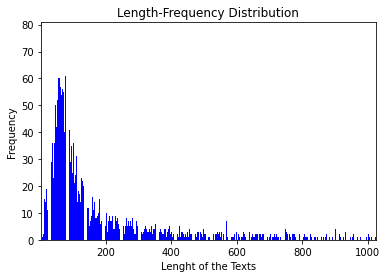

In [ ]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 1024)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

### Encoding Data into Numbers
To encode our text into numbers we will use  text_to_word_sequence function from keras.

In [ ]:
%%time
# Convert string into list of integer indices
sequences = tokenizer.texts_to_sequences(dataset['cleaned'])

CPU times: user 294 ms, sys: 1.43 ms, total: 295 ms
Wall time: 298 ms


In [ ]:
test_sequences = tokenizer.texts_ to_sequences(testset['cleaned'])

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 13509 unique tokens.


### Pad Sequence
To make all the texts fo the same length we will use pad sequence from keras to standardize their length.

Corpus contain our final processed data and labels contains the labels of associated data.

In [ ]:
%%time
## Before padding length of different training examples 
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Text length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen= 140)
## We get the maxlen value from the Length frequency distribution

print(corpus[1])


Maximum Text length 802
[ 535  235   15   91   45  614  157   39   15 1097   13 1146 1902 3079
    4 1446 1672    5  295  262  381  180 2341 3406 1446  111    1  234
    4  154 1988   49    9    4  795    3 1554 3814   46    1  322  754
    1    2 4347   51   91  535  235   15   91   45  157    5 2846   93
    5  108    2    1  425   45 4347  495    5  197  974  109  111   46
    1   96 1902    6  120  656   91   17 1446   94  704   55   37    6
 2637   15   91    3    5   91  382    3   12   42   14  182   14  954
 2847 5036    2  137 1606 1391 2342   51    4   53 5037   45 1446  286
   62   10 4348   59 3815   39    5    1   45  454  704  230    5   13
   14 2493    4 1446  705   16  742    1  118 2637   52   73  145  223]
CPU times: user 55.3 ms, sys: 687 µs, total: 56 ms
Wall time: 76.3 ms


In [ ]:
test_corpus = keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= 140)

In [ ]:
print("Shape of the courpus: ", corpus.shape)

for i in range(2):
    print(dataset['cleaned'][i],"\n",corpus[i])

Shape of the courpus:  (6859, 140)
মুরগির       সত্যিই মুখরোচক হয়  আমি এটা পছন্দ  এবং স্থান খুব ভাল  অনন্য   সজ্জিত             হবে ভিজিট আবার                   
 [ 103   40  261   11    1    9   43    2  116   19   10  785 1021   22
 2207   72    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
একটি ম্যাসেজ থেরাপিস্ট যারা ব্যাখ্যা করেছেন যে সে তার হাত ব্যবহার করে যে কোনও কিন্তু হালকা চাপ জড়িত একটি ম্যাসেজ যেত না   গত

## Creating Train, Test and Validation set


In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(corpus,dataset['Sentiment'],test_size = 0.2, random_state = 0)
X_train, y_train = corpus, dataset["Sentiment"]
X_test = test_corpus

print("Training Size: ",X_train.shape)
print("Test Size: ",X_test.shape)

Training Size:  (6859, 140)
Test Size:  (1715, 140)


## Single Layer LSTM with Keras Embedding


In [ ]:
# Keras Functional API

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
keras.backend.clear_session()

max_length = 140
embedding_dim = 64
number_of_classes = len(dataset['Sentiment'].unique())

# define bilstm model

def lstm():


   ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_length,))
  bi_embedding_layer = Embedding(max_words,embedding_dim)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
  # LSTM_Layer_2 = Bidirectional(LSTM(64))(LSTM_Layer_1)
  bi_dense_layer_1 = Dense(32, activation='relu')(LSTM_Layer_1)
  bi_dense_layer_2 = Dense(1, activation='sigmoid')(bi_dense_layer_1)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_2)


  return bilstm_model

# call the model
lstm_model = lstm()

lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 140)]             0         
                                                                 
 embedding (Embedding)       (None, 140, 64)           7680000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,706,945
Trainable params: 7,706,945
Non-trainable params: 0
___________________________________________________

In [ ]:
lstm_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [ ]:
%%time
history = lstm_model.fit(X_train,
                              y_train,
                              epochs = 20,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/20
193/193 [==============================] - 40s 149ms/step - loss: 0.4356 - accuracy: 0.7894 - val_loss: 0.3149 - val_accuracy: 0.8717
Epoch 2/20
193/193 [==============================] - 19s 100ms/step - loss: 0.2173 - accuracy: 0.9239 - val_loss: 0.3400 - val_accuracy: 0.8644
Epoch 3/20
193/193 [==============================] - 11s 59ms/step - loss: 0.1465 - accuracy: 0.9546 - val_loss: 0.3693 - val_accuracy: 0.8673
Epoch 4/20
193/193 [==============================] - 13s 67ms/step - loss: 0.1106 - accuracy: 0.9644 - val_loss: 0.4091 - val_accuracy: 0.8528
Epoch 5/20
193/193 [==============================] - 8s 43ms/step - loss: 0.0845 - accuracy: 0.9742 - val_loss: 0.4943 - val_accuracy: 0.8586
Epoch 6/20
193/193 [==============================] - 6s 29ms/step - loss: 0.0654 - accuracy: 0.9814 - val_loss: 0.5246 - val_accuracy: 0.8528
Epoch 7/20
193/193 [==============================] - 4s 23ms/step - loss: 0.0780 - accuracy: 0.9786 - val_loss: 0.3835 - val_accuracy: 

#### Plotting accuracy and loss graphs

Finaly loss and accuracy graph is plotted to take some important decision such as after how many epochs our model starts to overfit, what batch size give us better result, whether we need to get more data or not.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

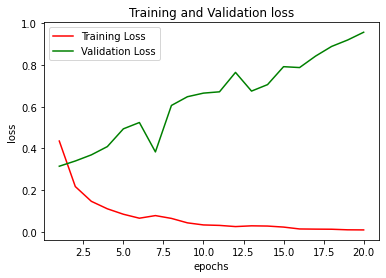

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

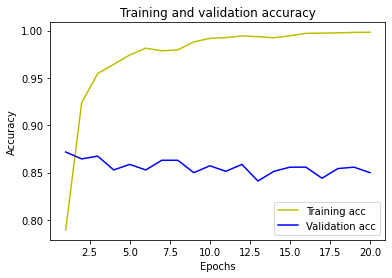

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
y_pred = lstm_model.predict(X_test)
y_pred = (y_pred>0.5).astype('int')
y_pred

54/54 [==============================] - 1s 7ms/step


array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

###Performance 

In [ ]:
#print(classification_report(y_test,y_pred))

In [ ]:
#confusion_matrix(y_test,y_pred)

# Stacked LSTM




###Checkpoint

In [ ]:
''' Callbacks with Checkpoint'''

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, 
                                             monitor='val_accuracy', 
                                             verbose=2,
                                             save_best_only=True, 
                                             save_weights_only=False,
                                             mode='max')
  # callback list
callback_list = [acc_callback, checkpoint] 


In [ ]:
keras.backend.clear_session()

max_length = 140
embedding_dim = 64
number_of_classes = len(dataset['Sentiment'].unique())

# define bilstm model

def stacked_lstm():


   ###### BiLSTM Model #######
  bi_text_inputs = Input(shape=(max_length,))
  bi_embedding_layer = Embedding(max_words,embedding_dim)(bi_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32,return_sequences = True))(bi_embedding_layer)
  LSTM_Layer_2 = Bidirectional(LSTM(16, return_sequences = True))(LSTM_Layer_1)
  LSTM_Layer_3 = Bidirectional(LSTM(8))(LSTM_Layer_2)
  bi_dense_layer_1 = Dense(1, activation='sigmoid')(LSTM_Layer_3)
  bilstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)


  return bilstm_model

# call the model
stacked_lstm_model = stacked_lstm()

stacked_lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 140)]             0         
                                                                 
 embedding (Embedding)       (None, 140, 64)           7680000   
                                                                 
 bidirectional (Bidirectiona  (None, 140, 64)          24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 140, 32)          10368     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 16)               2624      
 nal)                                                            
                                                             

In [ ]:
stacked_lstm_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [ ]:
%%time
history = stacked_lstm_model.fit(X_train,
                              y_train,
                              epochs = 20,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = callback_list)

Epoch 1/20
192/193 [============================>.] - ETA: 0s - loss: 0.4313 - accuracy: 0.8044
Epoch 1: val_accuracy improved from -inf to 0.87609, saving model to mymodel.h5
193/193 [==============================] - 36s 129ms/step - loss: 0.4303 - accuracy: 0.8051 - val_loss: 0.3237 - val_accuracy: 0.8761
Epoch 2/20
193/193 [==============================] - ETA: 0s - loss: 0.2511 - accuracy: 0.9167
Epoch 2: val_accuracy did not improve from 0.87609
193/193 [==============================] - 18s 91ms/step - loss: 0.2511 - accuracy: 0.9167 - val_loss: 0.3413 - val_accuracy: 0.8717
Epoch 3/20
192/193 [============================>.] - ETA: 0s - loss: 0.1875 - accuracy: 0.9437
Epoch 3: val_accuracy did not improve from 0.87609
193/193 [==============================] - 13s 65ms/step - loss: 0.1871 - accuracy: 0.9438 - val_loss: 0.3595 - val_accuracy: 0.8630
Epoch 4/20
193/193 [==============================] - ETA: 0s - loss: 0.1686 - accuracy: 0.9495
Epoch 4: val_accuracy did not impr

In [ ]:
y_pred = stacked_lstm_model.predict(X_test)
y_pred = (y_pred>0.5).astype('int')
y_pred

54/54 [==============================] - 3s 13ms/step


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

###Performance 

In [ ]:
#print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       595
           1       0.88      0.90      0.89       777

    accuracy                           0.87      1372
   macro avg       0.87      0.87      0.87      1372
weighted avg       0.87      0.87      0.87      1372



In [ ]:
#confusion_matrix(y_test,y_pred)

array([[496,  99],
       [ 76, 701]])

# BiLSTM + CNN

In [ ]:
keras.backend.clear_session()

max_length = 140
embedding_dim = 64
number_of_classes = len(dataset['Sentiment'].unique())

# define bilstm + Cnn model

def lstm_cnn():


  lc_text_inputs = Input(shape=(max_length,))
  lc_embedding_layer = Embedding(max_words,embedding_dim)(lc_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
  LSTM_Layer_2 = Bidirectional(LSTM(16,return_sequences=True))(LSTM_Layer_1)
  lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer_2)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_conv2 = Conv1D(64,2,activation='relu')(lc_pool1)
  lc_pool2 = MaxPooling1D(2)(lc_conv2)
  lc_flat = Flatten()(lc_pool2)
  lc_dense_layer_1 = Dense(1, activation='sigmoid')(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)


  return cnn_lstm_model

# call the model
lstm_cnn_model = lstm_cnn()

lstm_cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 140)]             0         
                                                                 
 embedding (Embedding)       (None, 140, 64)           7680000   
                                                                 
 bidirectional (Bidirectiona  (None, 140, 64)          24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 140, 32)          10368     
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 139, 32)           2080      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 69, 32)           0     

In [ ]:

#accuracy_threshold = 0.99

# class myCallback(keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#       if(logs.get('accuracy')>accuracy_threshold):
#         print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
#         self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "bilstm_cnn.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, 
                                             monitor='val_accuracy', 
                                             save_best_only=True
                                            )
  # callback list
callback_list = [checkpoint] 

In [ ]:
lstm_cnn_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [ ]:
%%time
history = lstm_cnn_model.fit(X_train,
                              y_train,
                              epochs = 20,
                              batch_size = 32,
                              verbose = 1,
                              validation_split =0.2,
                              callbacks = callback_list)

Epoch 1/20
172/172 [==============================] - 33s 125ms/step - loss: 0.4675 - accuracy: 0.7791 - val_loss: 0.3157 - val_accuracy: 0.8673
Epoch 2/20
172/172 [==============================] - 15s 85ms/step - loss: 0.2204 - accuracy: 0.9220 - val_loss: 0.3245 - val_accuracy: 0.8695
Epoch 3/20
172/172 [==============================] - 10s 59ms/step - loss: 0.1437 - accuracy: 0.9563 - val_loss: 0.3393 - val_accuracy: 0.8776
Epoch 4/20
172/172 [==============================] - 9s 53ms/step - loss: 0.1030 - accuracy: 0.9688 - val_loss: 0.4469 - val_accuracy: 0.8754
Epoch 5/20
172/172 [==============================] - 7s 42ms/step - loss: 0.0813 - accuracy: 0.9758 - val_loss: 0.4408 - val_accuracy: 0.8695
Epoch 6/20
172/172 [==============================] - 7s 43ms/step - loss: 0.0679 - accuracy: 0.9805 - val_loss: 0.5329 - val_accuracy: 0.8652
Epoch 7/20
172/172 [==============================] - 7s 40ms/step - loss: 0.0525 - accuracy: 0.9858 - val_loss: 0.5853 - val_accuracy: 0.

In [ ]:
lstm_cnn = load_model("bilstm_cnn.h5")

In [ ]:
y_pred = lstm_cnn.predict(X_test)
y_pred = (y_pred>0.5).astype('int')
y_pred

54/54 [==============================] - 2s 12ms/step


array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

###Performance 

In [ ]:
#print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       595
           1       0.90      0.90      0.90       777

    accuracy                           0.88      1372
   macro avg       0.88      0.88      0.88      1372
weighted avg       0.88      0.88      0.88      1372



In [ ]:
#confusion_matrix(y_test,y_pred)

array([[514,  81],
       [ 81, 696]])

# BiLSTM +CNN +Dropout

In [ ]:
keras.backend.clear_session()

max_length = 140
embedding_dim = 64
number_of_classes = len(dataset['Sentiment'].unique())

# define bilstm + Cnn model +dropout

def lstm_cnn():


  lc_text_inputs = Input(shape=(max_length,))
  lc_embedding_layer = Embedding(max_words,embedding_dim)(lc_text_inputs)
  LSTM_Layer_1 = Bidirectional(LSTM(32, dropout = 0.4, return_sequences=True))(lc_embedding_layer)
  LSTM_Layer_2 = Bidirectional(LSTM(16,dropout = 0.4, return_sequences=True))(LSTM_Layer_1)
  lc_conv1 = Conv1D(32,3,activation='relu')(LSTM_Layer_2)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_conv2 = Conv1D(64,3,activation='relu')(lc_pool1)
  lc_pool2 = MaxPooling1D(2)(lc_conv2)
  dropout =  keras.layers.Dropout(0.5)(lc_pool2)
  lc_flat = Flatten()(lc_pool2)
  lc_dense_layer_1 = Dense(1, activation='sigmoid')(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)


  return cnn_lstm_model

# call the model
lstm_cnn_model = lstm_cnn()

lstm_cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 140)]             0         
                                                                 
 embedding (Embedding)       (None, 140, 64)           7680000   
                                                                 
 bidirectional (Bidirectiona  (None, 140, 64)          24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 140, 32)          10368     
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 138, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 69, 32)           0     

In [ ]:
acc_callback = myCallback()
  # Saved the Best Model
filepath = "bilstm_cnn_dropout.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, 
                                             monitor='val_accuracy', 
                                             save_best_only=True
                                            )
  # callback list
callback_list = [checkpoint] 

In [ ]:
lstm_cnn_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [ ]:
%%time
history = lstm_cnn_model.fit(X_train,
                              y_train,
                              epochs = 20,
                              batch_size = 32,
                              validation_split =0.2,
                              callbacks = callback_list)

Epoch 1/20
172/172 [==============================] - 32s 131ms/step - loss: 0.4787 - accuracy: 0.7662 - val_loss: 0.3156 - val_accuracy: 0.8622
Epoch 2/20
172/172 [==============================] - 14s 82ms/step - loss: 0.2354 - accuracy: 0.9132 - val_loss: 0.3122 - val_accuracy: 0.8797
Epoch 3/20
172/172 [==============================] - 11s 62ms/step - loss: 0.1585 - accuracy: 0.9486 - val_loss: 0.3376 - val_accuracy: 0.8834
Epoch 4/20
172/172 [==============================] - 9s 55ms/step - loss: 0.1143 - accuracy: 0.9650 - val_loss: 0.3941 - val_accuracy: 0.8688
Epoch 5/20
172/172 [==============================] - 9s 50ms/step - loss: 0.0956 - accuracy: 0.9705 - val_loss: 0.8795 - val_accuracy: 0.8112
Epoch 6/20
172/172 [==============================] - 7s 41ms/step - loss: 0.0830 - accuracy: 0.9779 - val_loss: 0.4844 - val_accuracy: 0.8615
Epoch 7/20
172/172 [==============================] - 8s 44ms/step - loss: 0.0671 - accuracy: 0.9798 - val_loss: 0.5187 - val_accuracy: 0.

In [ ]:
lstm_cnn_dropout = load_model("bilstm_cnn_dropout.h5")

In [ ]:
y_pred = lstm_cnn_dropout.predict(X_test)
y_pred = (y_pred>0.5).astype('int')
y_pred

54/54 [==============================] - 2s 11ms/step


array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])